# **4 - BAM Network**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

### Pattern

In [ ]:
words_5_3 = {}
words_5_3['A'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['B'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['C'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['D'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['E'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['F'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['G'] = [[-1 for i in range(3)] for j in range(5)]
words_5_3['H'] = [[-1 for i in range(3)] for j in range(5)]

pattern_5_3 = {}
pattern_5_3['A'] = [(0, 1), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), 
                    (3, 2), (4, 0), (4, 2)]
pattern_5_3['B'] = [(0, 0), (0, 1), (1, 0), (1, 2), (2, 0), (2, 1), (3, 0),
                    (3, 2), (4, 0), (4, 1)]
pattern_5_3['C'] = [(0, 1), (0, 2), (1, 0), (2, 0), (3, 0), (4, 1), (4, 2)]

pattern_5_3['D'] = [(0, 0), (0, 1), (1, 0), (1, 2), (2, 0), (2, 2), (3, 0),
                    (3, 2), (4, 0), (4, 1)]

pattern_5_3['E'] = [(0, 0), (0, 1), (1, 0), (0, 2), (2, 0), (2, 1), (3, 0),
                    (4, 2), (4, 0), (4, 1)]

pattern_5_3['F'] = [(0, 0), (0, 1), (1, 0), (0, 2), (2, 0), (2, 1), (3, 0),
                    (4, 0)]

pattern_5_3['G'] = [(0, 1), (0, 2), (1, 0), (2, 0), (3, 0), (4, 1), (4, 2),
                    (2, 2), (3, 2)]

pattern_5_3['H'] = [(0, 0), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), 
                    (3, 2), (4, 0), (4, 2)]

for pattern in pattern_5_3['A']:
  words_5_3['A'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['B']:
  words_5_3['B'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['C']:
  words_5_3['C'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['D']:
  words_5_3['D'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['E']:
  words_5_3['E'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['F']:
  words_5_3['F'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['G']:
  words_5_3['G'][pattern[0]][pattern[1]] = 1

for pattern in pattern_5_3['H']:
  words_5_3['H'][pattern[0]][pattern[1]] = 1

In [ ]:
outs = {}
outs['A'] = [-1, -1, -1]
outs['B'] = [-1, -1, 1]
outs['C'] = [-1, 1, -1]
outs['D'] = [-1, 1, 1]
outs['E'] = [1, -1, -1]
outs['F'] = [1, -1, 1]
outs['G'] = [1, 1, -1]
outs['H'] = [1, 1, 1]

In [ ]:
def do_hebbian_rule(s, t):
  w = np.dot(s.T, t)
  return w

In [ ]:
def add_noise(noise_rate, inputs, alternative):
  noisy_inputs = inputs.copy()
  for input in noisy_inputs:
    noise_count = int(noise_rate * len(input))
    noises_index = random.sample(range(len(input)), noise_count)
    for noise_index in noises_index:
      input[noise_index] = alternative * input[noise_index]
  return noisy_inputs

### Train Model for A, B, C

In [ ]:
S = np.array(list(words_5_3.values())[0:3]).reshape(3, 15)
T = np.array(list(outs.values())[0:3])
W = do_hebbian_rule(S, T)

In [ ]:
print(W)

[[ 1 -1  3]
 [-3 -1 -1]
 [ 1  3 -1]
 [-3 -1 -1]
 [ 3  1  1]
 [-1 -3  1]
 [-3 -1 -1]
 [-1 -3  1]
 [ 1 -1 -1]
 [-3 -1 -1]
 [ 3  1  1]
 [-1 -3  1]
 [-1 -3  1]
 [-1  1  1]
 [-1  1 -3]]


### Test Network

In [ ]:
def bam(s, T, S,  W, iterate_num=30):
  previous_y = []
  converged = False
  # Step 2a
  x = s.copy()
  # Step 2b
  y = np.array([0 for i in range(len(T[0]))])
  # Step 3
  for i in range(iterate_num):
    if converged: break
    # Step 4
    y_in = np.dot(x, W)
    previous_y.append(y.copy())
    #  y_in = np.dot(x, W.T)
    y = np.where(y_in > 0, 1, -1)  
    # Step 5
    x_in = np.dot(y, W.T)
    # x_in = np.dot(y, W)
    x = np.where(x_in > 0, 1, -1) 
    pattern_y_exist = False
    pattern_x_exist = False
    y_exist = False
    for t in T:
      if np.array_equal(y, t):
        pattern_y_exist = True
        break
    for s_actual in S:
      if np.array_equal(x, s_actual):
        pattern_x_exist = True
        break
    for previous in previous_y:
      if np.array_equal(y, previous):
        y_exist = True
        break
    if (pattern_x_exist and pattern_y_exist) or y_exist:
      converged = True
  return y

In [ ]:
A = S[0]
B = S[1]
C = S[2]

A_prediction = bam(A, T, S, W)
B_prediction = bam(B, T, S, W)
C_prediction = bam(C, T, S, W)
print('A:')
print('Actual Output = {}, Model Output = {}'.format(T[0], A_prediction))
print('B:')
print('Actual Output = {}, Model Output = {}'.format(T[1], B_prediction))
print('C:')
print('Actual Output = {}, Model Output = {}'.format(T[2], C_prediction))

A:
Actual Output = [-1 -1 -1], Model Output = [-1 -1 -1]
B:
Actual Output = [-1 -1  1], Model Output = [-1 -1  1]
C:
Actual Output = [-1  1 -1], Model Output = [-1  1 -1]


In [ ]:
A_prediction = bam(T[0], S, T, W.T)
B_prediction = bam(T[1], S, T, W.T)
C_prediction = bam(T[2], S, T, W.T)
print('A:')
print('Actual Output = ')
print(np.where(S[0].reshape(5, 3) == 1, '#', '.'))
print('Model Output = ')
print(np.where(A_prediction.reshape(5, 3) == 1, '#', '.'))
print('B:')
print('Actual Output = ')
print(np.where(S[1].reshape(5, 3) == 1, '#', '.'))
print('Model Output = ')
print(np.where(B_prediction.reshape(5, 3) == 1, '#', '.'))
print('C:')
print('Actual Output = ')
print(np.where(S[2].reshape(5, 3) == 1, '#', '.'))
print('Model Output = ')
print(np.where(C_prediction.reshape(5, 3) == 1, '#', '.'))

A:
Actual Output = 
[['.' '#' '.']
 ['#' '.' '#']
 ['#' '#' '#']
 ['#' '.' '#']
 ['#' '.' '#']]
Model Output = 
[['.' '#' '.']
 ['#' '.' '#']
 ['#' '#' '#']
 ['#' '.' '#']
 ['#' '.' '#']]
B:
Actual Output = 
[['#' '#' '.']
 ['#' '.' '#']
 ['#' '#' '.']
 ['#' '.' '#']
 ['#' '#' '.']]
Model Output = 
[['#' '#' '.']
 ['#' '.' '#']
 ['#' '#' '.']
 ['#' '.' '#']
 ['#' '#' '.']]
C:
Actual Output = 
[['.' '#' '#']
 ['#' '.' '.']
 ['#' '.' '.']
 ['#' '.' '.']
 ['.' '#' '#']]
Model Output = 
[['.' '#' '#']
 ['#' '.' '.']
 ['#' '.' '.']
 ['#' '.' '.']
 ['.' '#' '#']]


In [ ]:
def run_model(S, W, T, count, alternative, noise_rate):
  correct_count = {'A':0, 'B':0, 'C':0}
  accuracy = {'A':0, 'B':0, 'C':0}
  predictions = {}
  for i in range(count):
    s = add_noise(noise_rate, S, alternative)
    predictions['A'] = bam(s[0], T, S, W)
    predictions['B'] = bam(s[1], T, S, W)
    predictions['C'] = bam(s[2], T, S, W)  
    if(np.array_equal(predictions['A'], T[0])): correct_count['A'] += 1
    if(np.array_equal(predictions['B'], T[1])): correct_count['B'] += 1
    if(np.array_equal(predictions['C'], T[2])): correct_count['C'] += 1
  accuracy['A'] = float(correct_count['A']) / count
  accuracy['B'] = float(correct_count['B']) / count
  accuracy['C'] = float(correct_count['C']) / count
  return accuracy

In [ ]:
def print_result(accs, noise_percentage, noise):
  print('Result of making {}% of data {}:'.format(noise_percentage, noise))
  for word, acc in accs.items():
    print('{} Accuracy is: {}%'.format(word, acc*100))

### 10% Noise

In [ ]:
accuracy = run_model(S, W, T, 100, -1, 0.1)
print_result(accuracy, 10, 'Negative')

Result of making 10% of data Negative:
A Accuracy is: 100.0%
B Accuracy is: 100.0%
C Accuracy is: 100.0%


### 40% Noise

In [ ]:
accuracy = run_model(S, W, T, 100, -1, 0.4)
print_result(accuracy, 40, 'Negative')

Result of making 40% of data Negative:
A Accuracy is: 40.0%
B Accuracy is: 30.0%
C Accuracy is: 54.0%


### Test with [0, -1, -1]

In [ ]:
prediction = bam(np.array([0, -1, -1]), S, T, W.T)

print('Model Output = ')
print(np.where(prediction.reshape(5, 3) == 1, '#', '.'))

Model Output = 
[['.' '#' '.']
 ['#' '.' '#']
 ['#' '#' '#']
 ['#' '.' '#']
 ['#' '.' '#']]


### Train Model for All

In [ ]:
S_all = np.array(list(words_5_3.values())).reshape(8, 15)
T_all = np.array(list(outs.values()))
W_all = do_hebbian_rule(S_all, T_all)

In [ ]:
print(W_all)

[[ 2 -2  6]
 [-2 -2 -2]
 [ 6  2 -2]
 [ 0  0  0]
 [ 0  0  0]
 [-4  0  4]
 [ 0  0  0]
 [ 2 -6  2]
 [ 0  4  0]
 [ 0  0  0]
 [ 0  0  0]
 [-2  2  2]
 [ 0 -4  4]
 [-2  2 -2]
 [ 2  2 -6]]


Test Model

In [ ]:
for i in range(len(S_all)):
  prediction = bam(S_all[i], T_all, S_all, W_all)
  print('{}:'.format(list(outs.keys())[i]))
  print('Actual Output = {}, Model Output = {}'.format(T_all[i], prediction))

A:
Actual Output = [-1 -1 -1], Model Output = [-1 -1  1]
B:
Actual Output = [-1 -1  1], Model Output = [-1 -1  1]
C:
Actual Output = [-1  1 -1], Model Output = [ 1  1 -1]
D:
Actual Output = [-1  1  1], Model Output = [-1  1  1]
E:
Actual Output = [ 1 -1 -1], Model Output = [ 1 -1 -1]
F:
Actual Output = [ 1 -1  1], Model Output = [ 1 -1  1]
G:
Actual Output = [ 1  1 -1], Model Output = [ 1  1 -1]
H:
Actual Output = [1 1 1], Model Output = [ 1 -1  1]


In [ ]:
S_4 = np.array(list(words_5_3.values())[0:4]).reshape(4, 15)
T_4 = np.array(list(outs.values())[0:4])
W_4 = do_hebbian_rule(S_4, T_4)

In [ ]:
for i in range(len(S_4)):
  prediction = bam(S_4[i], T_4, S_4, W_4)
  print('{}:'.format(list(outs.keys())[i]))
  print('Actual Output = {}, Model Output = {}'.format(T_4[i], prediction))

A:
Actual Output = [-1 -1 -1], Model Output = [-1 -1 -1]
B:
Actual Output = [-1 -1  1], Model Output = [-1 -1  1]
C:
Actual Output = [-1  1 -1], Model Output = [-1  1 -1]
D:
Actual Output = [-1  1  1], Model Output = [-1 -1  1]


In [ ]:
S_5 = np.array(list(words_5_3.values())[0:5]).reshape(5, 15)
T_5 = np.array(list(outs.values())[0:5])
W_5 = do_hebbian_rule(S_5, T_5)

In [ ]:
for i in range(len(S_5)):
  prediction = bam(S_5[i], T_5, S_5, W_5)
  print('{}:'.format(list(outs.keys())[i]))
  print('Actual Output = {}, Model Output = {}'.format(T_5[i], prediction))

A:
Actual Output = [-1 -1 -1], Model Output = [-1 -1 -1]
B:
Actual Output = [-1 -1  1], Model Output = [-1 -1  1]
C:
Actual Output = [-1  1 -1], Model Output = [-1  1 -1]
D:
Actual Output = [-1  1  1], Model Output = [-1 -1  1]
E:
Actual Output = [ 1 -1 -1], Model Output = [-1 -1 -1]


### Hamming Distance

In [ ]:
def find_hamming_distance(words, patterns):
  hammings = {}
  for x in words:
    hammings[x] = {}
    for y in words:
      hammings[x][y] = (np.array(patterns[x]) != np.array(patterns[y])).sum()
  return hammings

In [ ]:
hammings = find_hamming_distance(list(words_5_3.keys()), words_5_3)

In [ ]:
hammings

{'A': {'A': 0, 'B': 4, 'C': 7, 'D': 4, 'E': 6, 'F': 6, 'G': 5, 'H': 3},
 'B': {'A': 4, 'B': 0, 'C': 7, 'D': 2, 'E': 4, 'F': 4, 'G': 7, 'H': 5},
 'C': {'A': 7, 'B': 7, 'C': 0, 'D': 7, 'E': 3, 'F': 5, 'G': 2, 'H': 8},
 'D': {'A': 4, 'B': 2, 'C': 7, 'D': 0, 'E': 6, 'F': 6, 'G': 5, 'H': 5},
 'E': {'A': 6, 'B': 4, 'C': 3, 'D': 6, 'E': 0, 'F': 2, 'G': 5, 'H': 5},
 'F': {'A': 6, 'B': 4, 'C': 5, 'D': 6, 'E': 2, 'F': 0, 'G': 7, 'H': 5},
 'G': {'A': 5, 'B': 7, 'C': 2, 'D': 5, 'E': 5, 'F': 7, 'G': 0, 'H': 6},
 'H': {'A': 3, 'B': 5, 'C': 8, 'D': 5, 'E': 5, 'F': 5, 'G': 6, 'H': 0}}

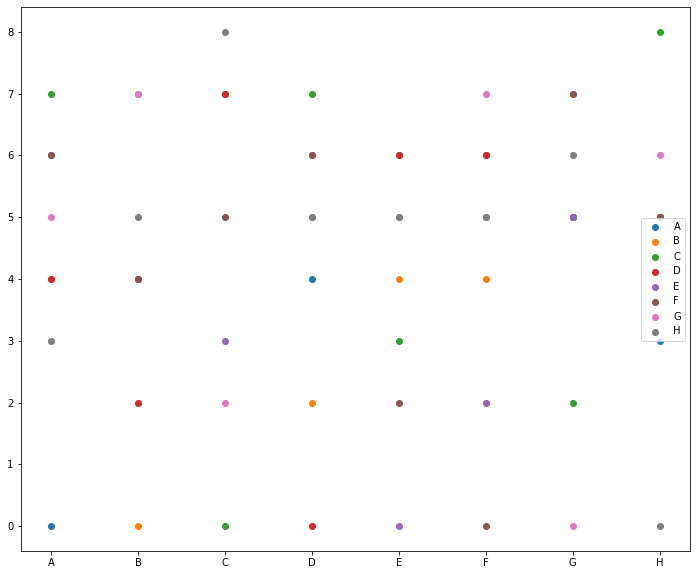

In [ ]:
plt.figure(figsize=(12,10))
for data_dict in hammings.values():
   x = data_dict.keys()
   y = data_dict.values()
   plt.scatter(x,y)

plt.legend(hammings.keys())
plt.show()